## Traffic Sign Recognition using CNN and Tensorflow | Deep Learning

__Description : Recognition of a traffic sign in an image using Convolutional Neural Network and tensorflow - _Deep Learning approach___

__Python libraries used :__
    1. Tensorflow
    2. Keras
    3. Numpy
    4. Matplotlib
    5. sklearn
    6. os
    7. PIL

### Import required libraries and load images

In [1]:
import numpy as np 
import pandas as pd 
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split

#check the version of tensorflow
tf.__version__

Using TensorFlow backend.


'2.0.0'

Loading traffic sign images and their labels from local computer.

In [14]:
import os
X_images = []
Y_labels = []
Num_of_classes = 43

direcotry = os.getcwd()
for i in range(Num_of_classes):
    path = os.path.join(direcotry,'images',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30, 30))
            image = np.array(image)
            X_images.append(image)
            Y_labels.append(i)
        except:
            print("Image cannot be loaded. Please try again later!!")


X_images and Y_labels have all the images and labels required for training and testing. All these images labels are in the list X and Y. Convert this list into numpy arrays

In [15]:
X = np.array(X_images)
Y = np.array(Y_labels)

print(X.shape, Y.shape)

(39209, 30, 30, 3) (39209,)


### Preparing train and test data with X as features and Y as labels.


Spliting the features and labels into 80% training and 20% test data

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

## Data Analysis

Inspect the shape and length and type of our train and test dataset.

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31367, 30, 30, 3)
(31367,)
(7842, 30, 30, 3)
(7842,)


In [18]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Image dataset above is set of 39,209 images of 43 different traffic signs like stop, turn right, red signal, drive slow etc. 31,367 training images and 7842 test images with their corresponding labels. All digits are labelled as their values.

### Analizing a sample image and its pixels


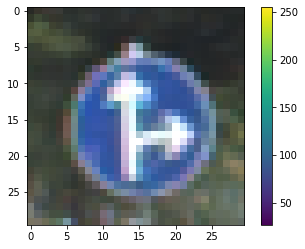

36


In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

print(y_train[0])

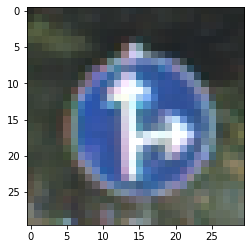

In [20]:
plt.imshow(x_train[0], cmap = plt.cm.gray_r, interpolation = 'nearest')

In [21]:
x_train[0].shape

(30, 30, 3)

Each image in this 39,209 images dataset has 900 features with 30 x 30 pixels. Each pixel represents pixel intensity with value from 0 to 255.

### Visualizing first 20 Images from the Dataset with their labels

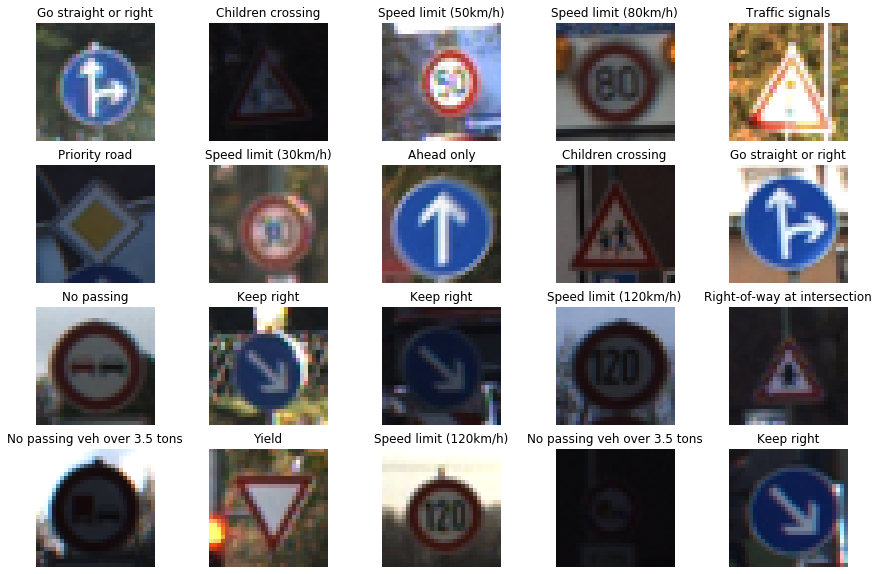

In [24]:
plt.figure(figsize = (15, 10))
number_to_class = [ 'Speed limit (20km/h)',
            'Speed limit (30km/h)',      
            'Speed limit (50km/h)',       
            'Speed limit (60km/h)',      
            'Speed limit (70km/h)',    
            'Speed limit (80km/h)',      
            'End of speed limit (80km/h)',     
            'Speed limit (100km/h)',    
            'Speed limit (120km/h)',     
           'No passing',   
           'No passing veh over 3.5 tons',     
           'Right-of-way at intersection',     
           'Priority road',    
           'Yield',     
           'Stop',       
           'No vehicles',       
           'Veh > 3.5 tons prohibited',       
           'No entry',       
           'General caution',     
           'Dangerous curve left',      
           'Dangerous curve right',   
           'Double curve',      
           'Bumpy road',     
           'Slippery road',       
           'Road narrows on the right',  
           'Road work',    
           'Traffic signals',      
           'Pedestrians',     
           'Children crossing',     
           'Bicycles crossing',       
           'Beware of ice/snow',
           'Wild animals crossing',      
           'End speed + passing limits',      
           'Turn right ahead',     
           'Turn left ahead',       
           'Ahead only',      
           'Go straight or right',      
           'Go straight or left',      
           'Keep right',     
           'Keep left',      
           'Roundabout mandatory',     
           'End of no passing',      
           'End no passing veh > 3.5 tons' ]

for i in range(0, 20):
    plt.subplot(4, 5, i + 1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title(number_to_class[y_train[i]])

We can vaguely recognize the images. Label assigned to each image referes to the index of class which it belongs to.

### Preparing data for training


In [25]:
# Converting into category out of 43 categories
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Convolutional Neural Network

### Building the model

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


#Creating Sequential model of Keras
model = Sequential()

# Adding first Convolutional layer and Maxpooking
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Adding second Convolutional layer and Maxpooking
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Convert input image to flat image of vector 32 x 32 = 1024
model.add(Flatten())

#Convolutional layer with input layer of neural network
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

#Convolutional layer with output layer of neural network
model.add(Dense(43, activation='softmax'))# output layer softmax for probability distribution

### Compiling the Model

In [27]:
#Compiling the model with categorical crossentropy since we have multiple classes (10)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the Model


In [30]:
# Fitting the training data into CNN Model
history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 108s 3ms/step - loss: 3.6952 - accuracy: 0.0528 - val_loss: 3.4796 - val_accuracy: 0.0574
Epoch 2/15
31367/31367 [==============================] - 107s 3ms/step - loss: 3.1557 - accuracy: 0.1465 - val_loss: 1.8007 - val_accuracy: 0.5493
Epoch 3/15
31367/31367 [==============================] - 106s 3ms/step - loss: 1.0336 - accuracy: 0.6999 - val_loss: 0.2884 - val_accuracy: 0.9184
Epoch 4/15
31367/31367 [==============================] - 107s 3ms/step - loss: 0.4855 - accuracy: 0.8563 - val_loss: 0.1315 - val_accuracy: 0.9639
Epoch 5/15
31367/31367 [==============================] - 107s 3ms/step - loss: 0.3326 - accuracy: 0.9050 - val_loss: 0.1024 - val_accuracy: 0.9739
Epoch 6/15
31367/31367 [==============================] - 107s 3ms/step - loss: 0.2756 - accuracy: 0.9228 - val_loss: 0.1025 - val_accuracy: 0.9726
Epoch 7/15
31367/31367 [==============================] - 107s 

Model took almost 26.4 minutes to complete the training. Model is now ready to test or calculate accuracy or predict any random image.

### Calculating CNN Model Accuracy

In [35]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Model Loss is : ', str(loss * 100) + ' %')
print('Model Accuracy is : ', str(accuracy * 100) + ' %')

7842/7842 [==============================] - 8s 976us/step
Model Loss is :  4.303590770159974 %
Model Accuracy is :  99.00535345077515 %


__Accuracy Plot__

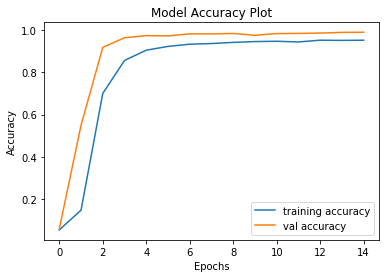

In [38]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


__Loss Plot__

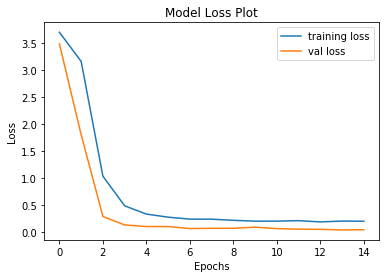

In [39]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Prediction on Test Images


Predicting the values of all test images and inspecting if prediction is correct

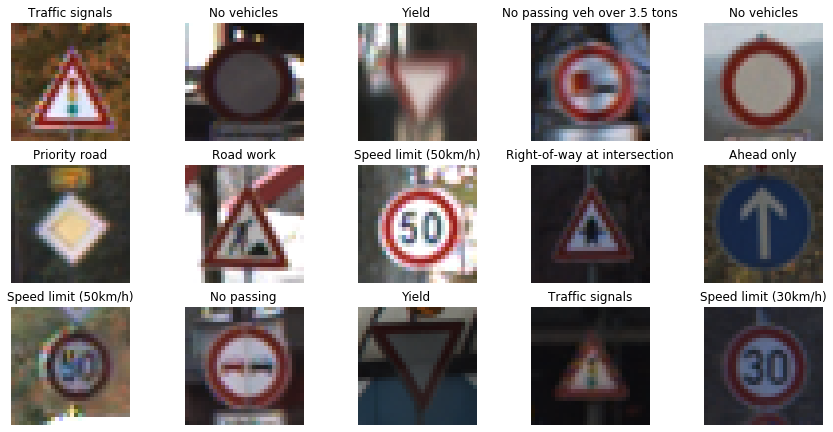

In [42]:
y_pred = model.predict(x_test)

plt.figure(figsize = (15, 10))
for i in range(0, 15):
    plt.subplot(4, 5, i + 1)
    plt.axis('off')
    plt.imshow(x_test[i], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title(number_to_class[np.argmax(y_pred[i])])

Checking the probability distribution for any random image in multi-class classification

In [46]:
import random
test_index = random.randint(0, 7842)

print("Probability distribution for a multi-class classification of index : ", test_index)
y_pred[test_index]

Probability distribution for a multi-class classification of index :  4895


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.8015949e-38, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.7072193e-33, 1.2063134e-37, 1.0000000e+00,
       2.3172953e-30, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [47]:
# Finding the value corresponding to the test_index by finding maximum probability out of 10 classes
print('The predicted value is : ', number_to_class[np.argmax(y_pred[test_index])])

The predicted value is :  Ahead only


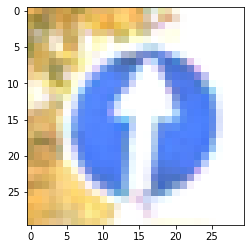

In [48]:
#Checking if the predicted value is correct
plt.imshow(x_test[test_index], cmap = plt.cm.binary)
plt.show()

Covolutional Neural Network Model is predicting the value correctly with random images.

## Predicting Random Image values with three SVM models


Define a function to display digit image along with its predicted value

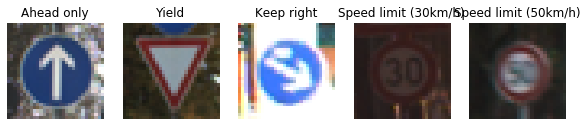

In [49]:
# Function to generate randome index values of specified length
def get_index_list(start, end, num): 
    index_list = [] 
    for i in range(num): 
        index_list.append(random.randint(start, end))   
    return index_list
  
# Displaying image and its predicted value
image_index = get_index_list(0, 300, 5)
plt.figure(figsize = (10, 10))
for i in range(len(image_index)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[image_index[i]], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.axis('off')
    plt.title(number_to_class[np.argmax(y_pred[image_index[i]])])


Above cell can be run again and again to see different random image result every time.

### Recognizing random image downloaded from internet

In [ ]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

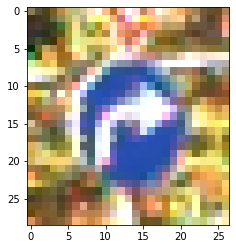

In [81]:
file_path = ('C:\\Users\\19294\\Desktop\\Jupyter\\Voice Assistant\\VA1\\traffic test\\image 4.png')
image = Image.open(file_path)
plt.imshow(image)

Image can have any size and shape. However, this CNN model is trained to predict image of a specific shape and we have to resize the input image before feeding it to the CNN Model.

In [85]:
# Resizing image before feeding to the model
from skimage.transform import resize

image = image.resize((30,30))
image = np.expand_dims(image, axis=0)
image = np.array(image)

In [86]:
probabilities = model.predict([image])[0]
index = np.argmax(probabilities)
print(index)
print(probabilities)
print(probabilities[index])
sign = number_to_class[index]
print(" This image is idetified as a. " + sign)

33
[0.0000000e+00 3.5035011e-27 2.1436122e-24 2.2956658e-25 2.8626039e-29
 1.1037764e-27 2.2462201e-32 2.4429008e-27 2.5638910e-27 2.1866067e-18
 9.0592746e-22 3.2959891e-24 1.3958559e-22 1.5078759e-22 1.2959945e-28
 6.4665369e-25 6.0748314e-21 1.7785100e-21 4.5889343e-29 2.1863159e-32
 1.1721348e-34 1.3386418e-32 0.0000000e+00 1.6826604e-34 2.8529457e-36
 5.0771740e-32 1.0075476e-29 1.6119547e-30 2.8714502e-30 2.7430651e-36
 1.8948021e-30 1.9243265e-36 3.4386894e-26 1.0000000e+00 5.4761905e-21
 1.0875057e-12 3.8159956e-25 1.1879496e-17 5.8445985e-23 5.9549340e-18
 4.0104359e-24 4.4634717e-28 1.0734902e-30]
1.0
 This image is idetified as a. Turn right ahead


## Result

Convolutonal Neural Network recognized traffic signs with confidence of 95.67 %. Project can be further implemented to recognize live traffic signs with webcam.